In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [16]:
b, s, p3 = sp.symbols('b s p3')
b_values = np.arange(-5, 8, 0.01)
print(b_values)

[-5.   -4.99 -4.98 ...  7.97  7.98  7.99]


In [17]:
polynom = -13*p3**4 + (30 + 6*b)*p3**3 - (21 + 6*b + b**2 - 3*s)*p3**2 + (4 + b*s + 3*s)*p3 - s**2/4
sturm_sequence = sp.polys.polytools.sturm(polynom, p3)

print("Последний многочлен системы Штурма:")
print(sturm_sequence[-1])

# Определяем уравнение
equation1 = sturm_sequence[-1].factor()

Последний многочлен системы Штурма:
(-8*b**11*s - 6*b**10*s**3 + 12*b**10*s**2 - 1920*b**10*s - 16*b**10 - 1428*b**9*s**3 + 1980*b**9*s**2 - 128568*b**9*s - 3792*b**9 - 656*b**8*s**4 - 92250*b**8*s**3 + 118848*b**8*s**2 - 1658640*b**8*s - 245760*b**8 - 49692*b**7*s**4 - 949194*b**7*s**3 + 6038676*b**7*s**2 - 12010824*b**7*s - 2576592*b**7 + 3912*b**6*s**5 + 3048492*b**6*s**4 - 7135218*b**6*s**3 + 70943940*b**6*s**2 - 31908744*b**6*s - 16051536*b**6 + 4239504*b**5*s**5 + 29937636*b**5*s**4 - 75297546*b**5*s**3 + 446919228*b**5*s**2 + 30543480*b**5*s - 33534000*b**5 + 1194388*b**4*s**6 - 1290924*b**4*s**5 + 164138985*b**4*s**4 - 711586026*b**4*s**3 + 1583056980*b**4*s**2 + 508090968*b**4*s - 27083808*b**4 - 46651488*b**3*s**6 - 124064568*b**3*s**5 + 298178928*b**3*s**4 - 3167185374*b**3*s**3 + 2743994556*b**3*s**2 + 1526665968*b**3*s - 7188912*b**3 - 19850064*b**2*s**7 - 421162248*b**2*s**6 - 186129036*b**2*s**5 - 456634206*b**2*s**4 - 7552646064*b**2*s**3 + 1306846224*b**2*s**2 + 206782

In [18]:
sol_1 = []
for b_val in b_values:
    solution1 = sp.solve(equation1.subs(b, b_val), s)
    real_solutions1 = [sol.evalf() for sol in solution1 if sol.is_real]
    for elem in real_solutions1:
        if b_val <= - 5 and b_val <= elem and elem < 1:
            sol_1.append((b_val, elem))
        elif -5 <= b_val and b_val <= -1 and b_val <= elem and elem < 1 + (5 + b_val)**2/24:
            sol_1.append((b_val, elem))
        elif -1 <= b_val and b_val <= 7 and -1 < elem and elem < 1 + (5 + b_val)**2/24:
            sol_1.append((b_val, elem))
        elif b_val > 7 and -1 < elem and elem <= b_val:
            sol_1.append((b_val, elem))
for elem in sol_1:
    print(elem)

(np.float64(-5.0), -1.54823409079033)
(np.float64(-5.0), 0.696296888170368)
(np.float64(-4.99), -1.54595964637892)
(np.float64(-4.99), 0.698333303290638)
(np.float64(-4.98), -1.54368416709986)
(np.float64(-4.98), 0.700381109461885)
(np.float64(-4.970000000000001), -1.54140765486250)
(np.float64(-4.970000000000001), 0.702440410693059)
(np.float64(-4.960000000000001), -1.53913011161262)
(np.float64(-4.960000000000001), 0.704511312475839)
(np.float64(-4.950000000000001), -1.53685153933286)
(np.float64(-4.950000000000001), 0.706593921814854)
(np.float64(-4.940000000000001), -1.53457194004314)
(np.float64(-4.940000000000001), 0.708688347258746)
(np.float64(-4.9300000000000015), -1.53229131580112)
(np.float64(-4.9300000000000015), 0.710794698932009)
(np.float64(-4.920000000000002), -1.53000966870259)
(np.float64(-4.920000000000002), 0.712913088567728)
(np.float64(-4.910000000000002), -1.52772700088196)
(np.float64(-4.910000000000002), 0.715043629541180)
(np.float64(-4.900000000000002), -1.52

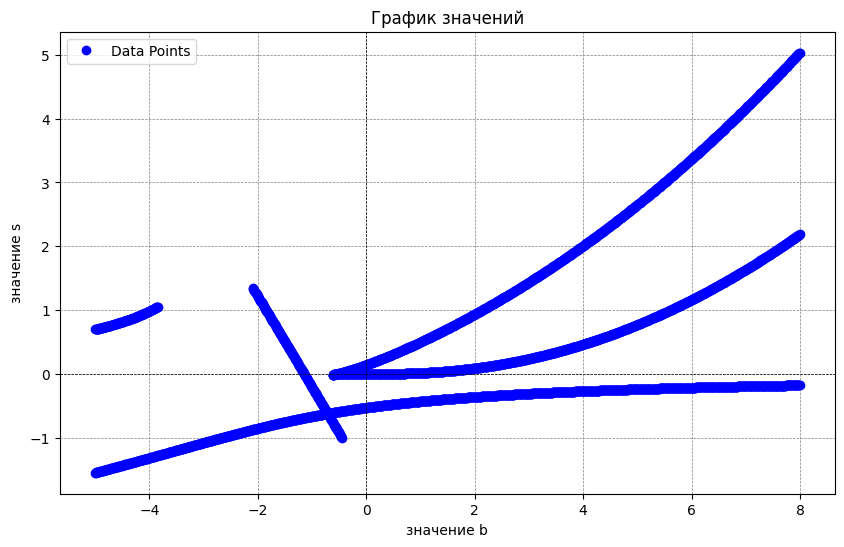

In [19]:
x, y = zip(*sol_1)  # Распаковываем кортежи в два списка

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='None', color='b', label='Data Points')

plt.title('График значений')
plt.xlabel('значение b')
plt.ylabel('значение s')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()